In [1]:
#Get directory path
import os
os.getcwd( )

'C:\\Users\\sajan\\OneDrive\\Documents'

In [2]:
os.chdir('C:\\Users\\sajan\\OneDrive\\Documents')
path = os.getcwd( )
path

'C:\\Users\\sajan\\OneDrive\\Documents'

# Predicting Floods using Classification

## Why are floods a problem?

This is an important problem because floods pop up everywehre and about 85 people die from floods every year in the United States. Floods also cost The United States more than a 100 billion dollars a year. Although search parties are mainy volonteers, the USA still sometimes has to pay for some of the resources. If we are able to predict floods better than before, than we could save people's lives from drowning and even save money.

## My Data

I found my data on Kaggle. The data I found had 20 catagories and I narrowed it down to the 5 most important ones. I chose River Management, Dams Quality,  Drainage Systems, Coastal Vulnerability, and Watersheds. The data works well for this problem because it shows the importance of each catagory.I used a CSV file for my data.

## Approach

Originally, we tried to use linear regression to predict the floods but we realized that the data I chose was catagorical meaning it wouldn't work with linear regression. Then, we tried using classification where we decided to say 0 or 1 meaning no flood or yes flood. The classification code worked and we got 66.7% accuarcy on Logistic Regression. I tested Logistic Regression, Random Forest, and Multinomial NB. All of the codes worked and gave results that weren't the best but still gave me answers to the code. Supervise learning models are very useful when testing code and predicting important issues.

## Deliverables

 Code: data visualization, machine learning algorithms, predicted and classified floods. Report on the Project(ReadME) Presentation:Technichal Interview.

In [8]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
raw_data = pd.read_csv('data/flood.csv')
raw_data.head()
#raw_data.dtypes

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


# visualize the data

sns.histplot(data = raw_data, x='Deforestation', kde=True, hue='FloodProbability')
plt.show()

In [11]:
raw_data.shape

(50000, 21)

test_df = raw_data[['RiverManagement', 'DamsQuality',  'DrainageSystems', 'CoastalVulnerability',  'Watersheds', 'DeterioratingInfrastructure',   'InadequatePlanning', 'FloodProbability']]
test_df.head()

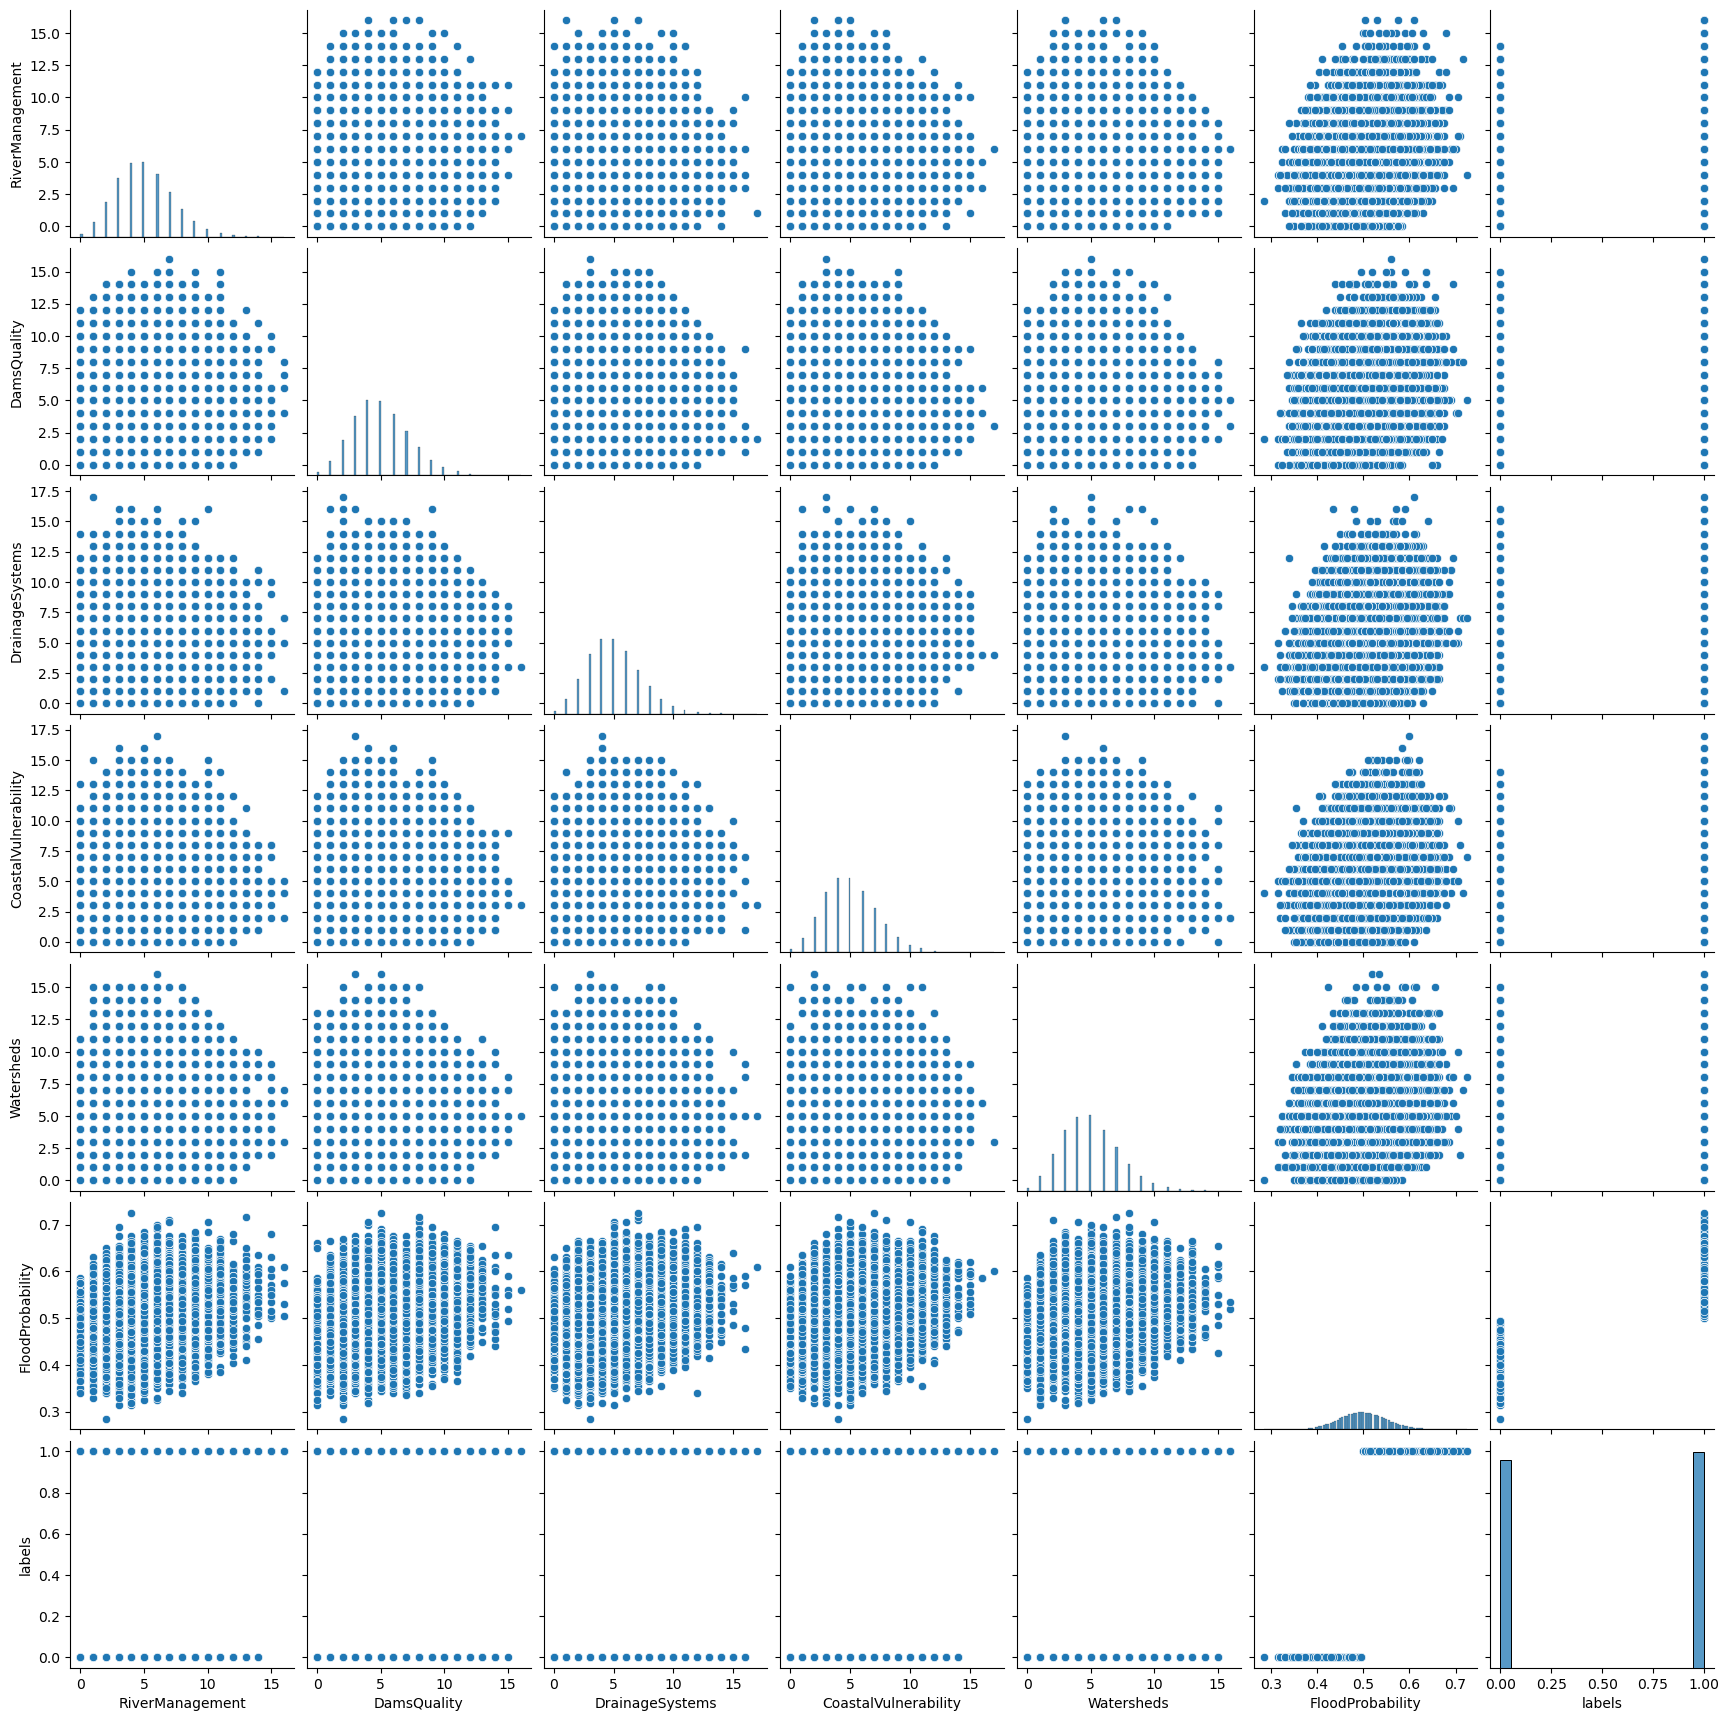

In [32]:
sns.pairplot(test_df)
plt.show()

In [10]:
# Select features (variables) and process labels
test_df = raw_data[['RiverManagement', 'DamsQuality',  'DrainageSystems', 'CoastalVulnerability',  'Watersheds', 'FloodProbability']]
test_df.loc[test_df['FloodProbability'] < 0.50, 'labels'] = 0
test_df.loc[test_df['FloodProbability'] >= 0.50, 'labels'] = 1
test_df['labels'] = test_df['labels'].astype(int)
test_df.head()

C:\Users\sajan\AppData\Local\Temp\ipykernel_2892\1180437566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.loc[test_df['FloodProbability'] < 0.50, 'labels'] = 0
C:\Users\sajan\AppData\Local\Temp\ipykernel_2892\1180437566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['labels'] = test_df['labels'].astype(int)


,RiverManagement,DamsQuality,DrainageSystems,CoastalVulnerability,Watersheds,FloodProbability,labels
0,6,6,10,7,2,0.450,0
1,5,1,9,2,2,0.475,0
2,4,4,7,4,8,0.515,1
3,2,1,4,2,6,0.520,1
4,5,5,7,6,3,0.475,0


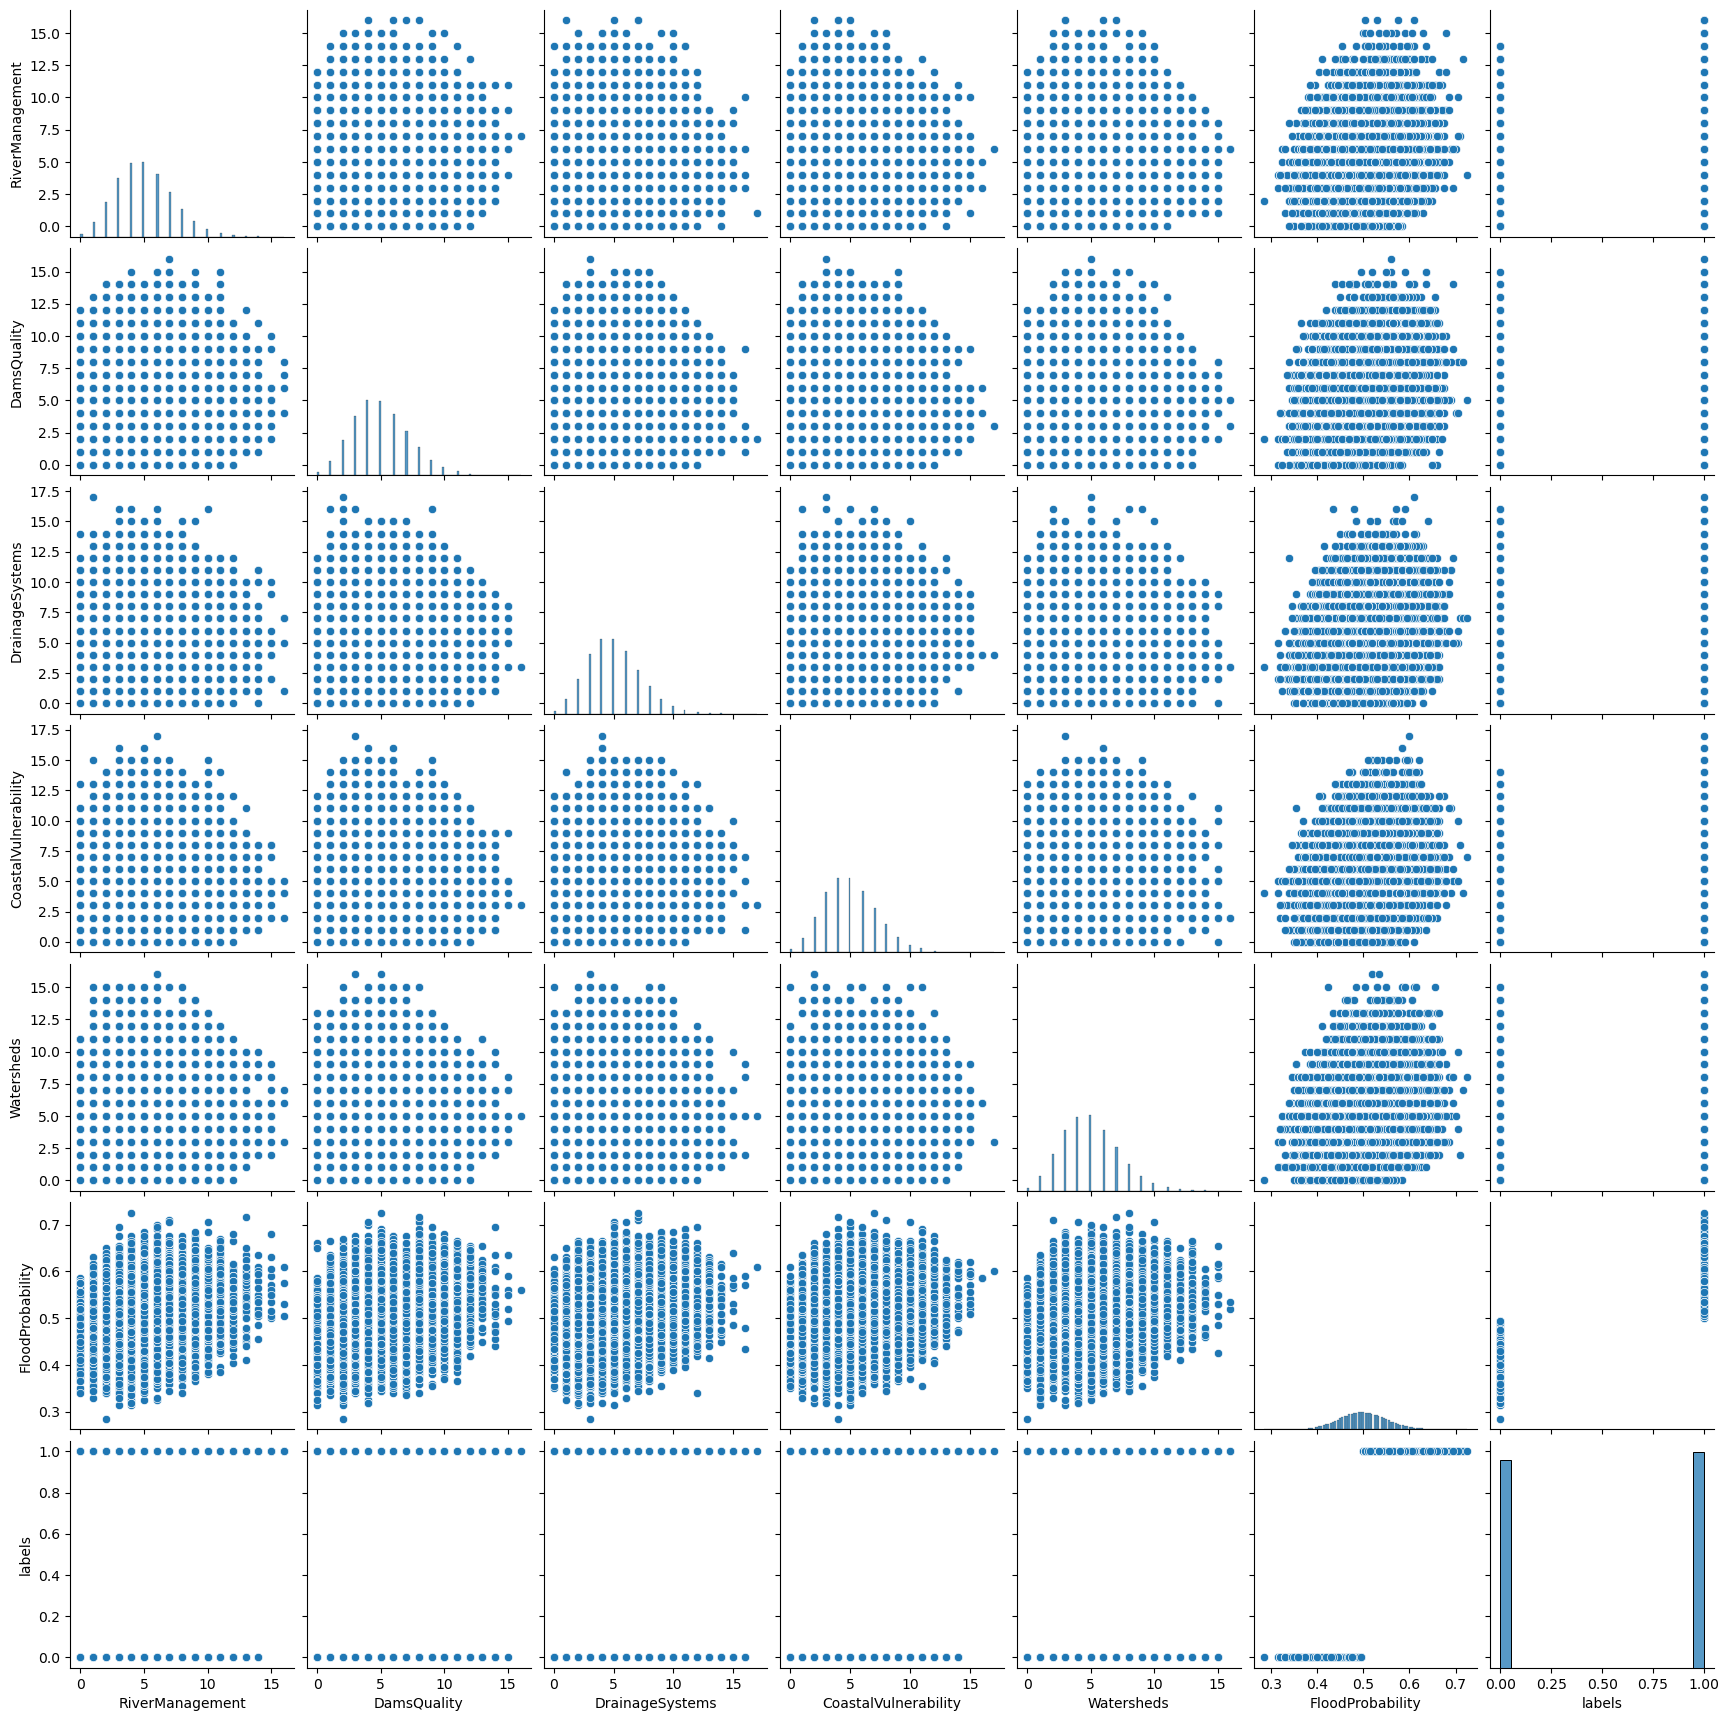

In [33]:
sns.pairplot(test_df)
plt.show()

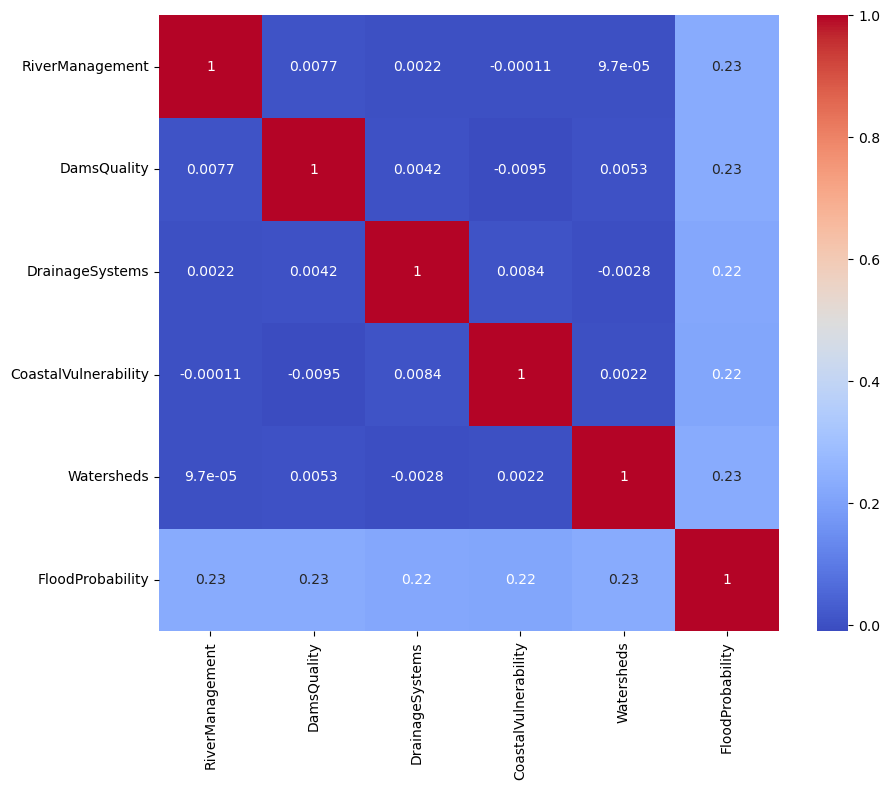

In [11]:
corr_df = test_df[['RiverManagement', 'DamsQuality',  'DrainageSystems', 'CoastalVulnerability',  'Watersheds', 'FloodProbability']]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# create the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm' , annot=True)
plt.show()

In [17]:
# Load the packages
from sklearn.model_selection import train_test_split

In [14]:
# Split the data into test and train sets at 30:70 percent splits
features = ['RiverManagement', 'DamsQuality',  'DrainageSystems', 'CoastalVulnerability',  'Watersheds']
X = test_df[features] # Features
y = test_df['labels'] # Target variable

In [15]:
print(X.shape)
print(y.shape)

(50000, 5)
(50000,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape of X_train:  ', X_train.shape)
print('Shape of X_test:  ', X_test.shape)
print('Shape of y_train:  ', y_train.shape)
print('Shape of y_test:  ', y_test.shape)

Shape of X_train:   (35000, 5)
Shape of X_test:   (15000, 5)
Shape of y_train:   (35000,)
Shape of y_test:   (15000,)


In [19]:
# import the packages
from sklearn.linear_model import LogisticRegression

# instantiate the model (using parameters for multiclass)
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\sajan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [21]:

#Create dataframe to compare
data = {'y_test': y_test, 'y_pred': y_pred}
test_pred = pd.DataFrame(data)
test_pred.head()

,y_test,y_pred
33553,0,0
9427,0,1
199,0,1
12447,0,0
39489,0,1


In [40]:
# Find instances where the classificatio algorithm was incorrect
incorrect = test_pred[test_pred['y_test'] != test_pred['y_pred']]
print(incorrect.shape)
incorrect.head()

(4991, 2)


,y_test,y_pred
9427,0,1
199,0,1
39489,0,1
49498,0,1
4144,1,0


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Calculate scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average = 'macro')
precision = precision_score(y_test, y_pred, average = 'macro')
print(f"Accuracy Score: {accuracy}")
print(f"Recall score: {recall}")
print(f"Precision score: {precision}")

Accuracy Score: 0.6672666666666667
Recall score: 0.6667537078252948
Precision score: 0.6671546385367131


In [25]:
# import the packages
from sklearn.naive_bayes import MultinomialNB

# instantiate the model (using the default parameters)
mnb = MultinomialNB()

# fit the model with data
mnb.fit(X_train, y_train)
y_predNB = mnb.predict(X_test)

In [26]:
#Create dataframe to compare
dataNB = {'y_test': y_test, 'y_predNB': y_predNB}
test_predNB = pd.DataFrame(dataNB)
test_predNB.head()

,y_test,y_predNB
33553,0,1
9427,0,1
199,0,1
12447,0,1
39489,0,1


In [36]:
# Find instances where y_pred was incorrect
incorrectNB = test_predNB[test_predNB['y_test'] != test_predNB['y_predNB']]
print(incorrectNB.shape)
incorrectNB.head()

(7511, 2)


,y_test,y_predNB
33553,0,1
9427,0,1
199,0,1
12447,0,1
39489,0,1


In [38]:
# Calculate scores
accuracyNB = accuracy_score(y_test, y_predNB)
recallNB = recall_score(y_test, y_predNB, average = 'macro')
precisionNB = precision_score(y_test, y_predNB, average = 'macro')
print(f"Accuracy Score: {accuracyNB}")
print(f"Recall score: {recallNB}")
print(f"Precision score: {precisionNB}")

Accuracy Score: 0.4992666666666667
Recall score: 0.4904750672169285
Precision score: 0.47423919357224553


In [39]:
# Import the package
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rnf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=42)

# fit the model with data
rnf.fit(X_train, y_train)
y_predRF = rnf.predict(X_test)

In [30]:
#Create dataframe to compare
dataRF = {'y_test': y_test, 'y_predRF': y_predRF}
test_predRF = pd.DataFrame(dataRF)
print(test_predRF.shape)
test_predRF.head()

(15000, 2)


,y_test,y_predRF
33553,0,0
9427,0,1
199,0,0
12447,0,0
39489,0,1


In [ ]:
# Find instances where y_pred was incorrect
incorrectRF = test_predRF[test_predRF['y_test'] != test_predRF['y_predRF']]
print(incorrectRF.shape)
incorrectRF.head()

In [32]:
# Calculate scores
accuracyRF = accuracy_score(y_test, y_predRF)
recallRF = recall_score(y_test, y_predRF, average = 'macro')
precisionRF = precision_score(y_test, y_predRF, average = 'macro')
print(f"Accuracy Score: {accuracyRF}")
print(f"Recall score: {recallRF}")
print(f"Precision score: {precisionRF}")

Accuracy Score: 0.597
Recall score: 0.5970755913777067
Precision score: 0.5970286582639224


## Conclusion

These results tell me that the logistic regression worked the best with my data. Also, Random Forest  got me to 60% which is good for my first time making a project with Python. However, My models told me that logistic regression is the best one for my project. This means that this is a good start for me and for a good start to building a solution. Next, people could use data to realize and predict floods in the future.